# Import libraries

In [11]:
import pandas as pd
import numpy as np
# %pip install pyarrow

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings("ignore")

# Read dataset into a dataframe using read_parquet

In [12]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-02.parquet")

In [13]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-02-01 00:12:15,2025-02-01 00:15:48,N,1.0,166,41,1.0,0.65,6.5,...,0.5,1.80,0.0,NaN,1.0,10.80,1.0,1.0,0.00,0.00
1,2,2025-01-31 23:57:05,2025-02-01 00:24:24,N,1.0,255,161,1.0,6.57,31.7,...,0.5,0.00,0.0,NaN,1.0,37.70,2.0,1.0,2.75,0.75
2,2,2025-02-01 00:24:26,2025-02-01 00:49:54,N,1.0,75,182,2.0,8.36,36.6,...,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,0.00
3,1,2025-02-01 00:17:15,2025-02-01 00:25:56,N,1.0,97,209,1.0,2.40,12.8,...,1.5,3.75,0.0,NaN,1.0,22.55,1.0,1.0,2.75,0.75
4,2,2025-02-01 00:17:36,2025-02-01 00:26:36,N,1.0,7,223,1.0,1.31,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0.00


In [14]:
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [15]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [16]:
# df = df[df.trip_type == 2]

<Axes: >

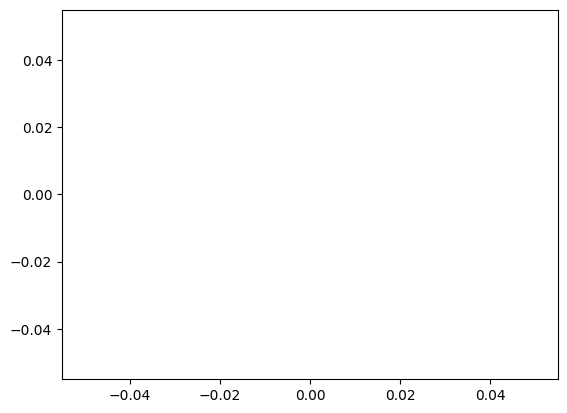

In [17]:
sns.distplot()

In [18]:
df.duration.describe()

count    46621.000000
mean        20.373587
std         93.494792
min         -7.433333
25%          7.266667
50%         11.433333
75%         17.233333
max       1439.716667
Name: duration, dtype: float64

In [21]:
# df.duration.describe(percentiles=[0.9, 0.95, 0.98, 0.99])
df = df[((df.duration >= 1) & (df.duration <= 60))]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,2025-02-01 00:12:15,2025-02-01 00:15:48,N,1.0,166,41,1.0,0.65,6.50,...,1.80,0.00,NaN,1.0,10.80,1.0,1.0,0.00,0.00,3.550000
1,2,2025-01-31 23:57:05,2025-02-01 00:24:24,N,1.0,255,161,1.0,6.57,31.70,...,0.00,0.00,NaN,1.0,37.70,2.0,1.0,2.75,0.75,27.316667
2,2,2025-02-01 00:24:26,2025-02-01 00:49:54,N,1.0,75,182,2.0,8.36,36.60,...,0.00,0.00,NaN,1.0,39.10,2.0,1.0,0.00,0.00,25.466667
3,1,2025-02-01 00:17:15,2025-02-01 00:25:56,N,1.0,97,209,1.0,2.40,12.80,...,3.75,0.00,NaN,1.0,22.55,1.0,1.0,2.75,0.75,8.683333
4,2,2025-02-01 00:17:36,2025-02-01 00:26:36,N,1.0,7,223,1.0,1.31,10.70,...,2.64,0.00,NaN,1.0,15.84,1.0,1.0,0.00,0.00,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46616,2,2025-02-28 22:35:00,2025-02-28 23:10:00,None,NaN,181,161,NaN,8.23,44.39,...,7.41,0.00,NaN,1.0,56.80,NaN,NaN,NaN,0.75,35.000000
46617,2,2025-02-28 23:40:00,2025-02-28 23:55:00,None,NaN,166,141,NaN,4.10,27.67,...,6.38,0.00,NaN,1.0,38.30,NaN,NaN,NaN,0.00,15.000000
46618,2,2025-02-28 23:34:00,2025-02-28 23:48:00,None,NaN,41,48,NaN,4.09,27.71,...,0.00,0.00,NaN,1.0,32.71,NaN,NaN,NaN,0.75,14.000000
46619,2,2025-02-28 23:52:00,2025-03-01 00:05:00,None,NaN,75,140,NaN,2.25,16.64,...,1.00,0.00,NaN,1.0,21.89,NaN,NaN,NaN,0.00,13.000000


In [66]:
# categorical = ['PULocationID', 'DOLocationID']
categorical = []
numerical = ['trip_distance', 'fare_amount']

In [67]:
df[categorical] = df[categorical].astype(str)

In [68]:
train_dict = df[categorical + numerical].to_dict(orient="records")

In [69]:
dv = sklearn.feature_extraction.DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [70]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 88436 stored elements and shape (44218, 2)>

In [71]:
dv.feature_names_

['fare_amount', 'trip_distance']

In [72]:
target = 'duration'
y_train = df[target].values

In [73]:
y_train

array([ 3.55      , 27.31666667, 25.46666667, ..., 14.        ,
       13.        , 13.        ])

In [74]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(X_train)

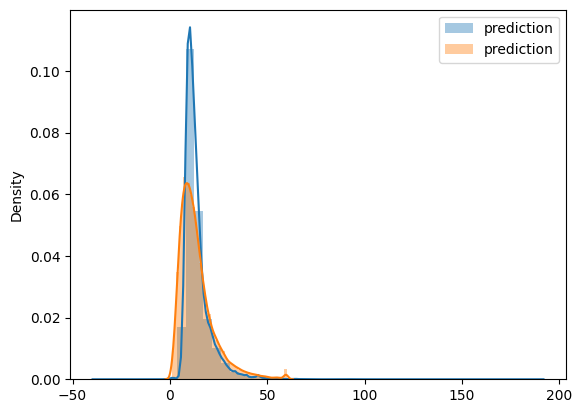

In [76]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='prediction')

plt.legend()

In [ ]:
sklearn.metrics.mean_squared_error(y_train, y_pred)

5.962570546669238